# Hypothesis Evaluation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
from sklearn.datasets import load_boston

In [2]:
st0 = np.load("./seed.npy",allow_pickle=True)
np.random.set_state(tuple(st0))

In [3]:
input_feature = 'RM'
target_feature = 'MEDV'
boston_dataset = load_boston()
boston_df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_df[target_feature] = boston_dataset.target

/home/gabry/Dataspell/LinearRegression/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [4]:
boston_df_shuffled = boston_df.sample(frac=1)

In [5]:
X = boston_df_shuffled[[input_feature]]
y = boston_df_shuffled[[target_feature]]

## Split Dataset into training validation and test

In [6]:
train_X = X.iloc[:int(X.shape[0]*0.6),:]
train_y = y.iloc[:int(y.shape[0]*0.6),:]

val_X = X.iloc[int(X.shape[0]*0.6):int(X.shape[0]*0.8),:]
val_y = y.iloc[int(y.shape[0]*0.6):int(y.shape[0]*0.8),:]

test_X = X.iloc[int(X.shape[0]*0.8):,:]
test_y = y.iloc[int(y.shape[0]*0.8):,:]

## Plot distribution of the partitioned sets

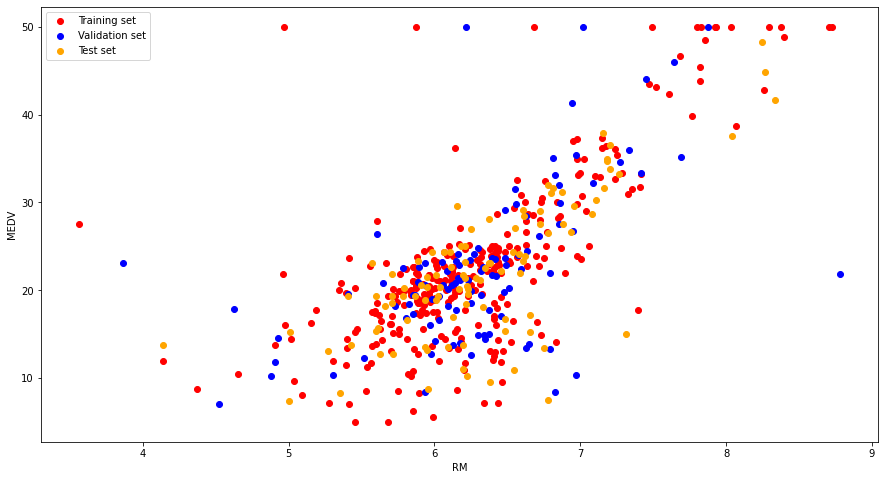

In [7]:
plt.figure(figsize=(15,8))
plt.scatter(train_X,train_y, label='Training set', c='r')
plt.scatter(val_X,val_y, label='Validation set', c='b')
plt.scatter(test_X,test_y,label='Test set', c='orange')
plt.xlabel(input_feature)
plt.ylabel(target_feature)
plt.legend()
plt.show()

## Fit different models on the training set

In [8]:
def polynomial_features(dataframe, degree):
    df = dataframe.copy()
    feature_name = dataframe.columns[0]
    for i in range(1,degree):
        key = "{}^{}".format(feature_name,i+1)
        df[key] = df[feature_name]**(i+1)
    return df

In [9]:
def normalEquationReg(X,y, l =0.0):
    Ir = np.identity(X.shape[1])
    Ir[0][0] = 0
    etime = -time.time()
    theta = np.linalg.pinv(X.T.dot(X) + l*Ir).dot(X.T).dot(y)
    etime += time.time()
    etime = np.round(etime*1000,3)
    return theta, etime

In [10]:
X_poly_2_train = polynomial_features(train_X,2)
X_poly_2_val = polynomial_features(val_X,2)
X_poly_2_test = polynomial_features(test_X,2)

X_poly_3_train = polynomial_features(train_X,3)
X_poly_3_val = polynomial_features(val_X,3)
X_poly_3_test = polynomial_features(test_X,3)

X_poly_4_train = polynomial_features(train_X,4)
X_poly_4_val = polynomial_features(val_X,4)
X_poly_4_test = polynomial_features(test_X,4)

In [11]:
X_linear_train = np.c_[np.ones((train_X.shape[0],1)), train_X]
X_linear_val = np.c_[np.ones((val_X.shape[0],1)), val_X]
X_linear_test = np.c_[np.ones((test_X.shape[0],1)), test_X]

X_poly_2_int_train = np.c_[np.ones((X_poly_2_train.shape[0],1)),X_poly_2_train]
X_poly_2_int_val = np.c_[np.ones((X_poly_2_val.shape[0],1)),X_poly_2_val]
X_poly_2_int_test = np.c_[np.ones((X_poly_2_test.shape[0],1)),X_poly_2_test]

X_poly_3_int_train = np.c_[np.ones((X_poly_3_train.shape[0],1)),X_poly_3_train]
X_poly_3_int_val = np.c_[np.ones((X_poly_3_val.shape[0],1)),X_poly_3_val]
X_poly_3_int_test = np.c_[np.ones((X_poly_3_test.shape[0],1)),X_poly_3_test]

X_poly_4_int_train = np.c_[np.ones((X_poly_4_train.shape[0],1)),X_poly_4_train]
X_poly_4_int_val = np.c_[np.ones((X_poly_4_val.shape[0],1)),X_poly_4_val]
X_poly_4_int_test = np.c_[np.ones((X_poly_4_test.shape[0],1)),X_poly_4_test]

In [12]:
theta_linear,_ = normalEquationReg(X_linear_train,train_y,l=0.0)
theta_2,_ = normalEquationReg(X_poly_2_int_train,train_y)
theta_3,_ = normalEquationReg(X_poly_3_int_train,train_y)
theta_4,_ = normalEquationReg(X_poly_4_int_train,train_y)

## Plot fitted models

In [13]:
X_2,yhat_2 = zip(*sorted(zip(train_X.values, X_poly_2_int_train.dot(theta_2))))
X_3,yhat_3 = zip(*sorted(zip(train_X.values, X_poly_3_int_train.dot(theta_3))))
X_4,yhat_4 = zip(*sorted(zip(train_X.values, X_poly_4_int_train.dot(theta_4))))

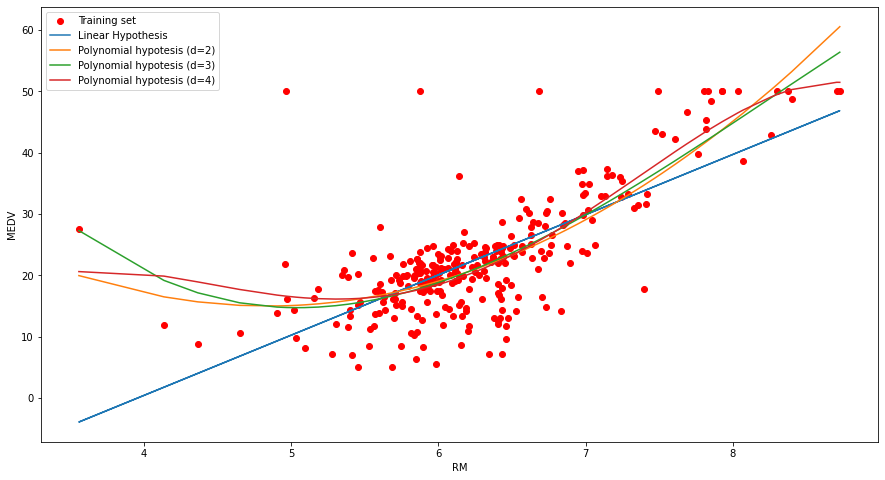

In [14]:
plt.figure(figsize=(15,8))
plt.xlabel(input_feature)
plt.ylabel(target_feature)
plt.scatter(train_X,train_y,c='r', label='Training set')
plt.plot(train_X.values,X_linear_train.dot(theta_linear), label = 'Linear Hypothesis')
plt.plot(X_2,yhat_2, label = 'Polynomial hypotesis (d=2)')
plt.plot(X_3,yhat_3, label = 'Polynomial hypotesis (d=3)')
plt.plot(X_4,yhat_4, label = 'Polynomial hypotesis (d=4)')
plt.legend()
plt.show()

## Evaluation on the validation set

In [15]:
def computeCostVectorizedReg(X, y, theta = np.zeros((X.shape[1],1)), l = 0.0):
    J = 0
    m = X.shape[0]
    elapsed_time = -time.time()
    J = 1/(2*m) * ((X.dot(theta) - y).T.dot(X.dot(theta) - y) + l*theta[1:].T.dot(theta[1:]))
    elapsed_time += time.time()
    elapsed_time_ms = np.round(elapsed_time*1000,3)
    return J,elapsed_time_ms

In [16]:
X_2_val,yhat_2_val = zip(*sorted(zip(val_X.values, X_poly_2_int_val.dot(theta_2))))
X_3_val,yhat_3_val = zip(*sorted(zip(val_X.values, X_poly_3_int_val.dot(theta_3))))
X_4_val,yhat_4_val = zip(*sorted(zip(val_X.values, X_poly_4_int_val.dot(theta_4))))

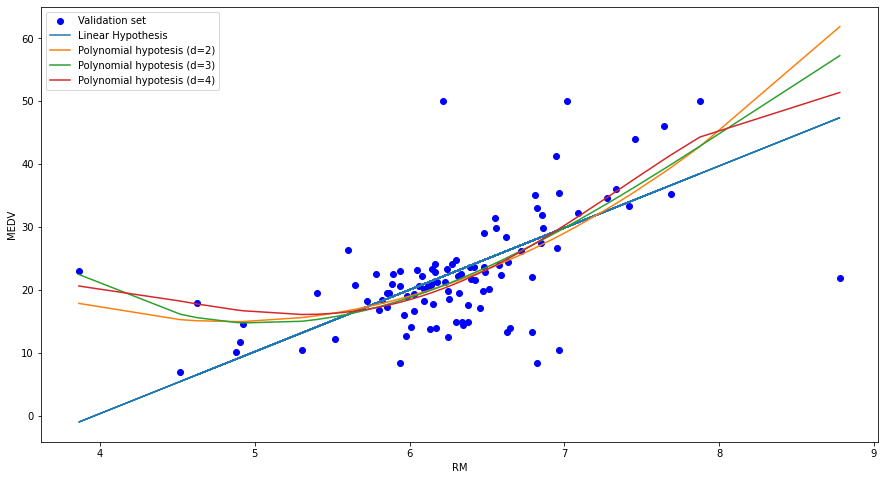

In [17]:
plt.figure(figsize=(15,8))
plt.xlabel(input_feature)
plt.ylabel(target_feature)
plt.scatter(val_X,val_y,c='b', label='Validation set')
plt.plot(val_X.values,X_linear_val.dot(theta_linear), label = 'Linear Hypothesis')
plt.plot(X_2_val,yhat_2_val, label = 'Polynomial hypotesis (d=2)')
plt.plot(X_3_val,yhat_3_val, label = 'Polynomial hypotesis (d=3)')
plt.plot(X_4_val,yhat_4_val, label = 'Polynomial hypotesis (d=4)')
plt.legend()
plt.show()

In [18]:
J_linear,_= computeCostVectorizedReg(X_linear_val, val_y, theta = theta_linear, l = 0.0)
J_poly_2, _ = computeCostVectorizedReg(X_poly_2_int_val,val_y,theta=theta_2)
J_poly_3, _ = computeCostVectorizedReg(X_poly_3_int_val,val_y,theta=theta_3)
J_poly_4, _ = computeCostVectorizedReg(X_poly_4_int_val,val_y,theta=theta_4)

In [19]:
print('J linear: {}\nJ poly 2: {}\nJ poly 3: {}\nJ poly 4: {}\n'.format(J_linear.values[0][0],J_poly_2.values[0][0],J_poly_3.values[0][0],J_poly_4.values[0][0]))

J linear: 28.814458332994572
J poly 2: 28.710953781085106
J poly 3: 26.96851919186396
J poly 4: 25.23571360183063



## Inference on the test set with the best model

In [24]:
X_4_test,yhat_4_test = zip(*sorted(zip(test_X.values, X_poly_4_int_test.dot(theta_4))))

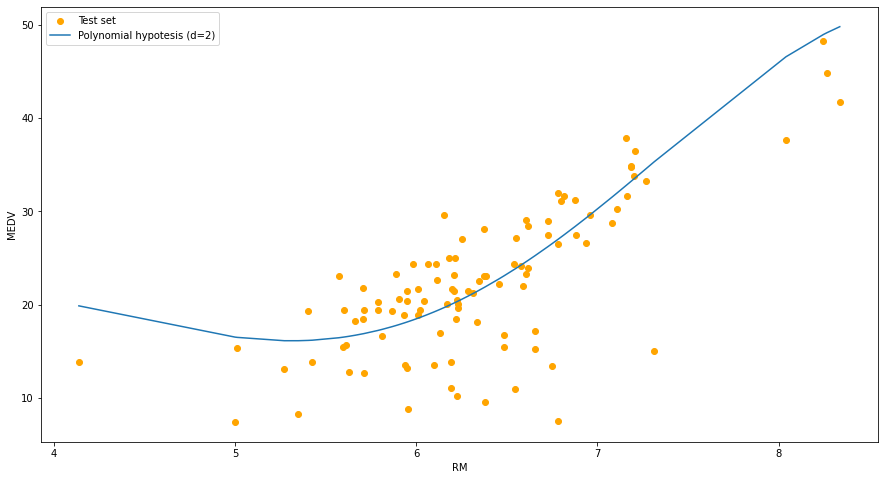

In [25]:
plt.figure(figsize=(15,8))
plt.xlabel(input_feature)
plt.ylabel(target_feature)
plt.scatter(test_X,test_y,c='orange', label='Test set')
#plt.plot(val_X.values,X_linear_val.dot(theta_linear), label = 'Linear Hypothesis')
plt.plot(X_4_test,yhat_4_test, label = 'Polynomial hypotesis (d=2)')
#plt.plot(X_3_val,yhat_3_val, label = 'Polynomial hypotesis (d=3)')
#plt.plot(X_4_val,yhat_4_val, label = 'Polynomial hypotesis (d=4)')
plt.legend()
plt.show()

In [26]:
J_poly_4_test, _ = computeCostVectorizedReg(X_poly_4_int_test,test_y,theta=theta_4)
print('J poly 2: {}'.format(J_poly_4_test.values[0][0]))

J poly 2: 15.09183336402625


In [5]:
#st0 = np.random.get_state()
#np.save("./seed",st0)